# Applying linear regression to NBA statistics to predict points scored per game

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
per_game = pd.read_csv('per-game-br.csv')

In [53]:
per_game.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,10,0,4.5,0.4,1.2,...,1.000,0.1,0.3,0.4,0.6,0.3,0.1,0.2,0.4,1.3
3,4,Steven Adams\adamsst01,C,25,OKC,55,55,33.9,6.3,10.3,...,0.550,4.5,5.0,9.5,1.7,1.6,0.8,1.6,2.5,14.7
4,5,Bam Adebayo\adebaba01,C,21,MIA,56,6,22.1,2.9,5.2,...,0.719,2.1,4.6,6.7,2.0,0.8,0.8,1.4,2.5,7.8


In [54]:
per_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 30 columns):
Rk        639 non-null int64
Player    639 non-null object
Pos       639 non-null object
Age       639 non-null int64
Tm        639 non-null object
G         639 non-null int64
GS        639 non-null int64
MP        639 non-null float64
FG        639 non-null float64
FGA       639 non-null float64
FG%       630 non-null float64
3P        639 non-null float64
3PA       639 non-null float64
3P%       591 non-null float64
2P        639 non-null float64
2PA       639 non-null float64
2P%       622 non-null float64
eFG%      630 non-null float64
FT        639 non-null float64
FTA       639 non-null float64
FT%       583 non-null float64
ORB       639 non-null float64
DRB       639 non-null float64
TRB       639 non-null float64
AST       639 non-null float64
STL       639 non-null float64
BLK       639 non-null float64
TOV       639 non-null float64
PF        639 non-null float64
PS/G   

In [55]:
per_game.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,630.000000,639.000000,639.000000,...,583.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000
mean,253.142410,26.148670,33.081377,15.314554,19.548983,3.137715,6.963693,0.441165,0.903599,2.611111,...,0.746885,0.790610,2.726917,3.515806,1.873239,0.625978,0.376682,1.07230,1.755243,8.507199
std,142.344851,4.151684,19.450918,19.974819,9.355670,2.193157,4.537067,0.113883,0.799237,2.089041,...,0.146902,0.782272,1.923651,2.545126,1.697274,0.453804,0.402778,0.79048,0.860706,6.009651
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,129.500000,23.000000,15.000000,0.000000,11.950000,1.500000,3.500000,0.397000,0.300000,0.950000,...,0.677500,0.300000,1.400000,1.700000,0.700000,0.300000,0.100000,0.50000,1.100000,4.000000
50%,255.000000,26.000000,37.000000,4.000000,19.800000,2.700000,6.000000,0.438000,0.800000,2.300000,...,0.769000,0.600000,2.300000,3.000000,1.300000,0.600000,0.300000,0.90000,1.700000,7.200000
75%,376.500000,29.000000,51.000000,28.500000,27.500000,4.300000,9.700000,0.493750,1.400000,3.950000,...,0.834000,1.000000,3.600000,4.600000,2.500000,0.900000,0.500000,1.40000,2.400000,11.800000
max,502.000000,42.000000,59.000000,59.000000,37.400000,10.800000,24.400000,1.000000,5.100000,13.600000,...,1.000000,5.100000,11.000000,15.000000,11.200000,2.400000,2.700000,5.40000,4.000000,36.600000


In [56]:
per_game.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PS/G'],
      dtype='object')

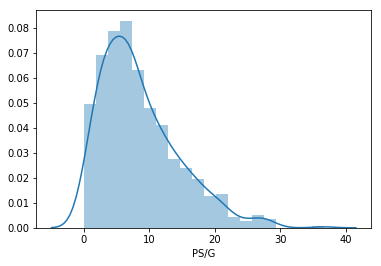

In [57]:
sns.distplot(per_game['PS/G'], bins=20)

In [58]:
labels_to_drop = ['Rk', 'Pos', 'Tm', 'Player']
per_game.drop(labels=labels_to_drop, inplace=True, axis=1)

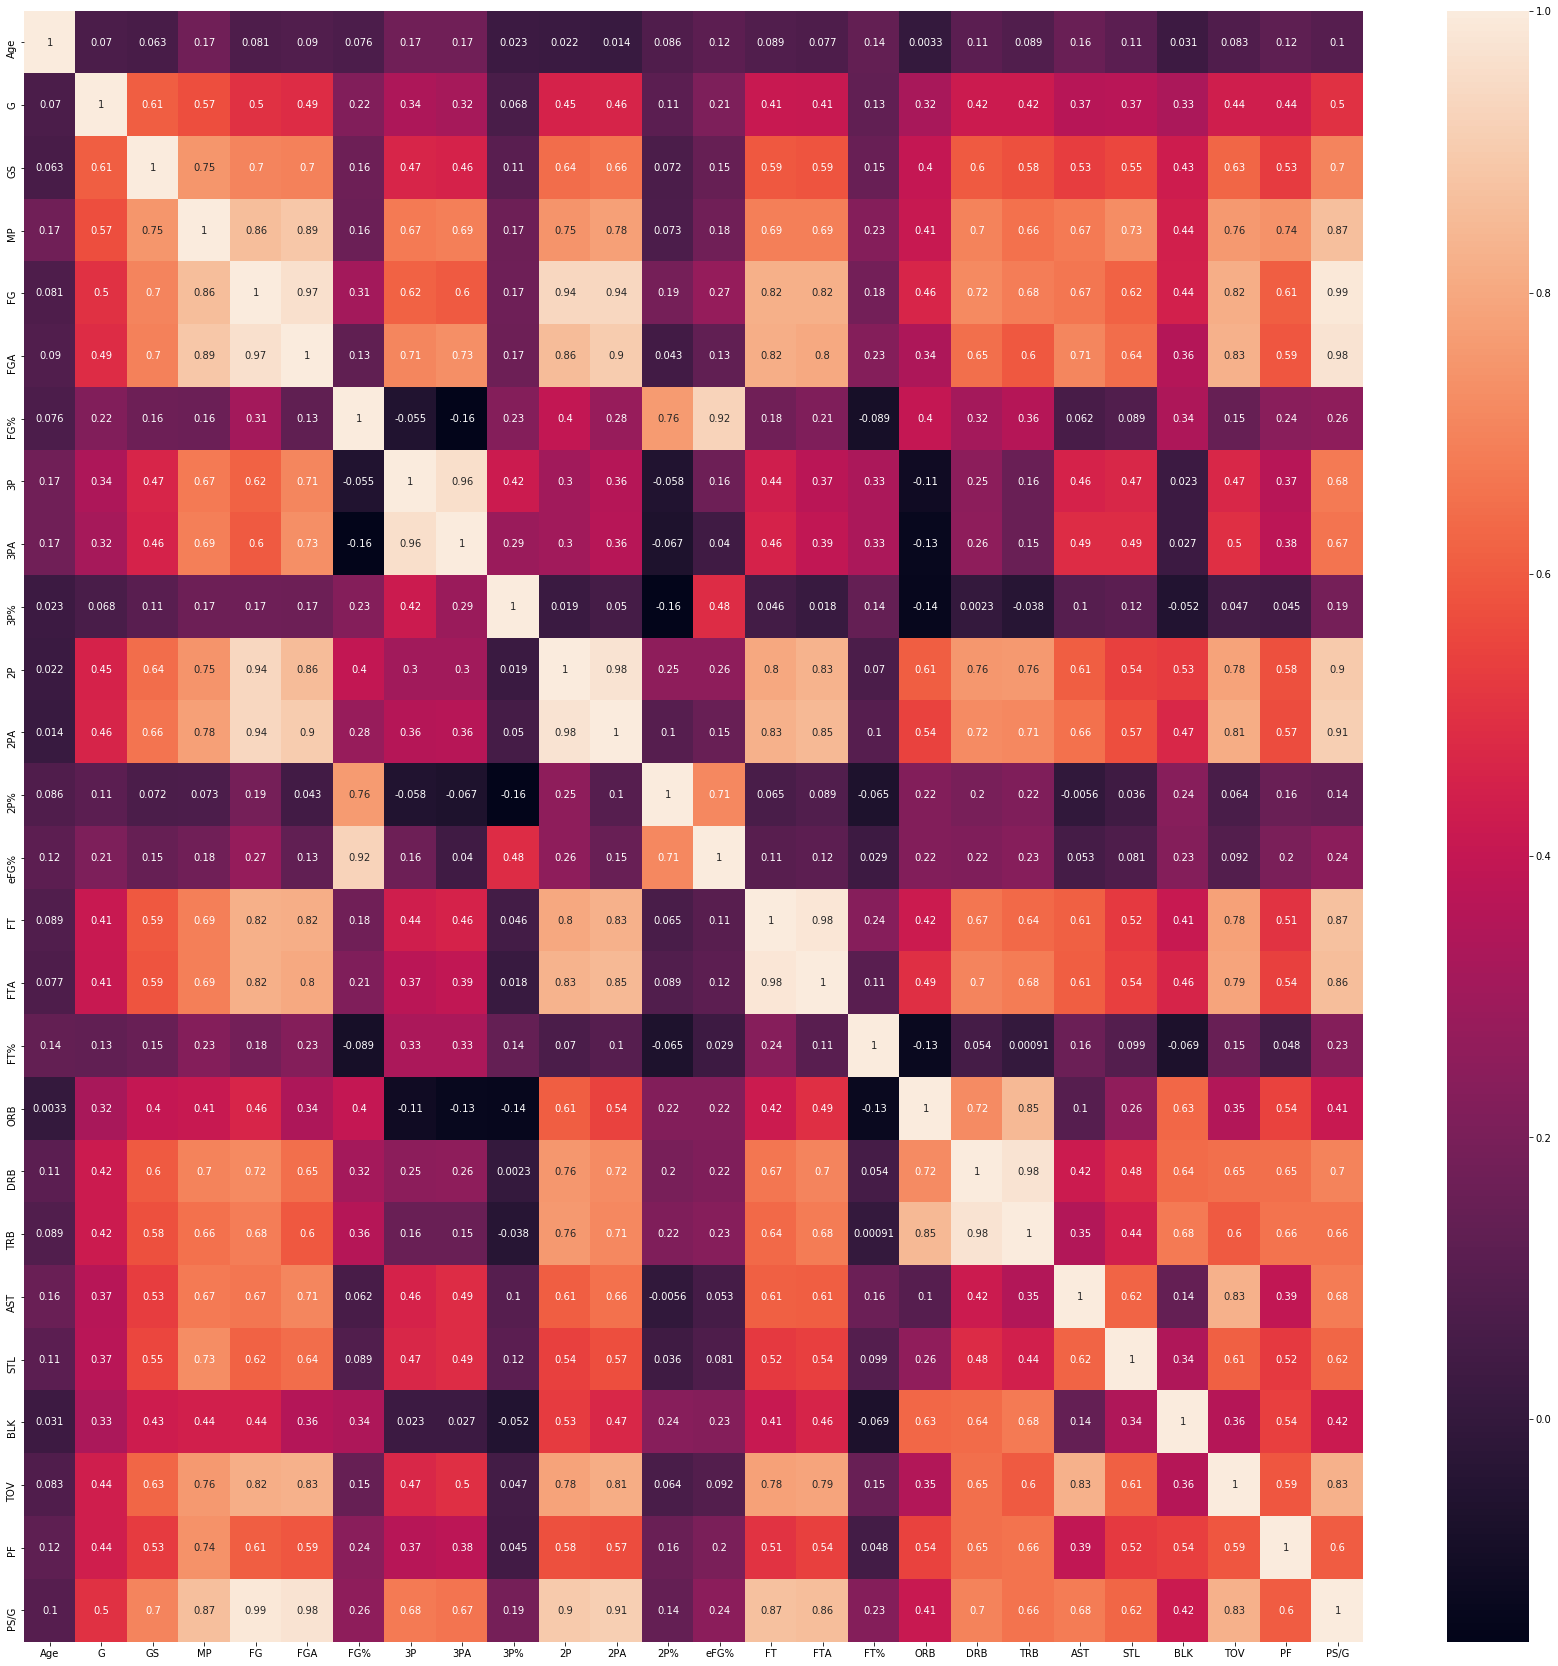

In [59]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(per_game.corr(), annot=True, ax=ax)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


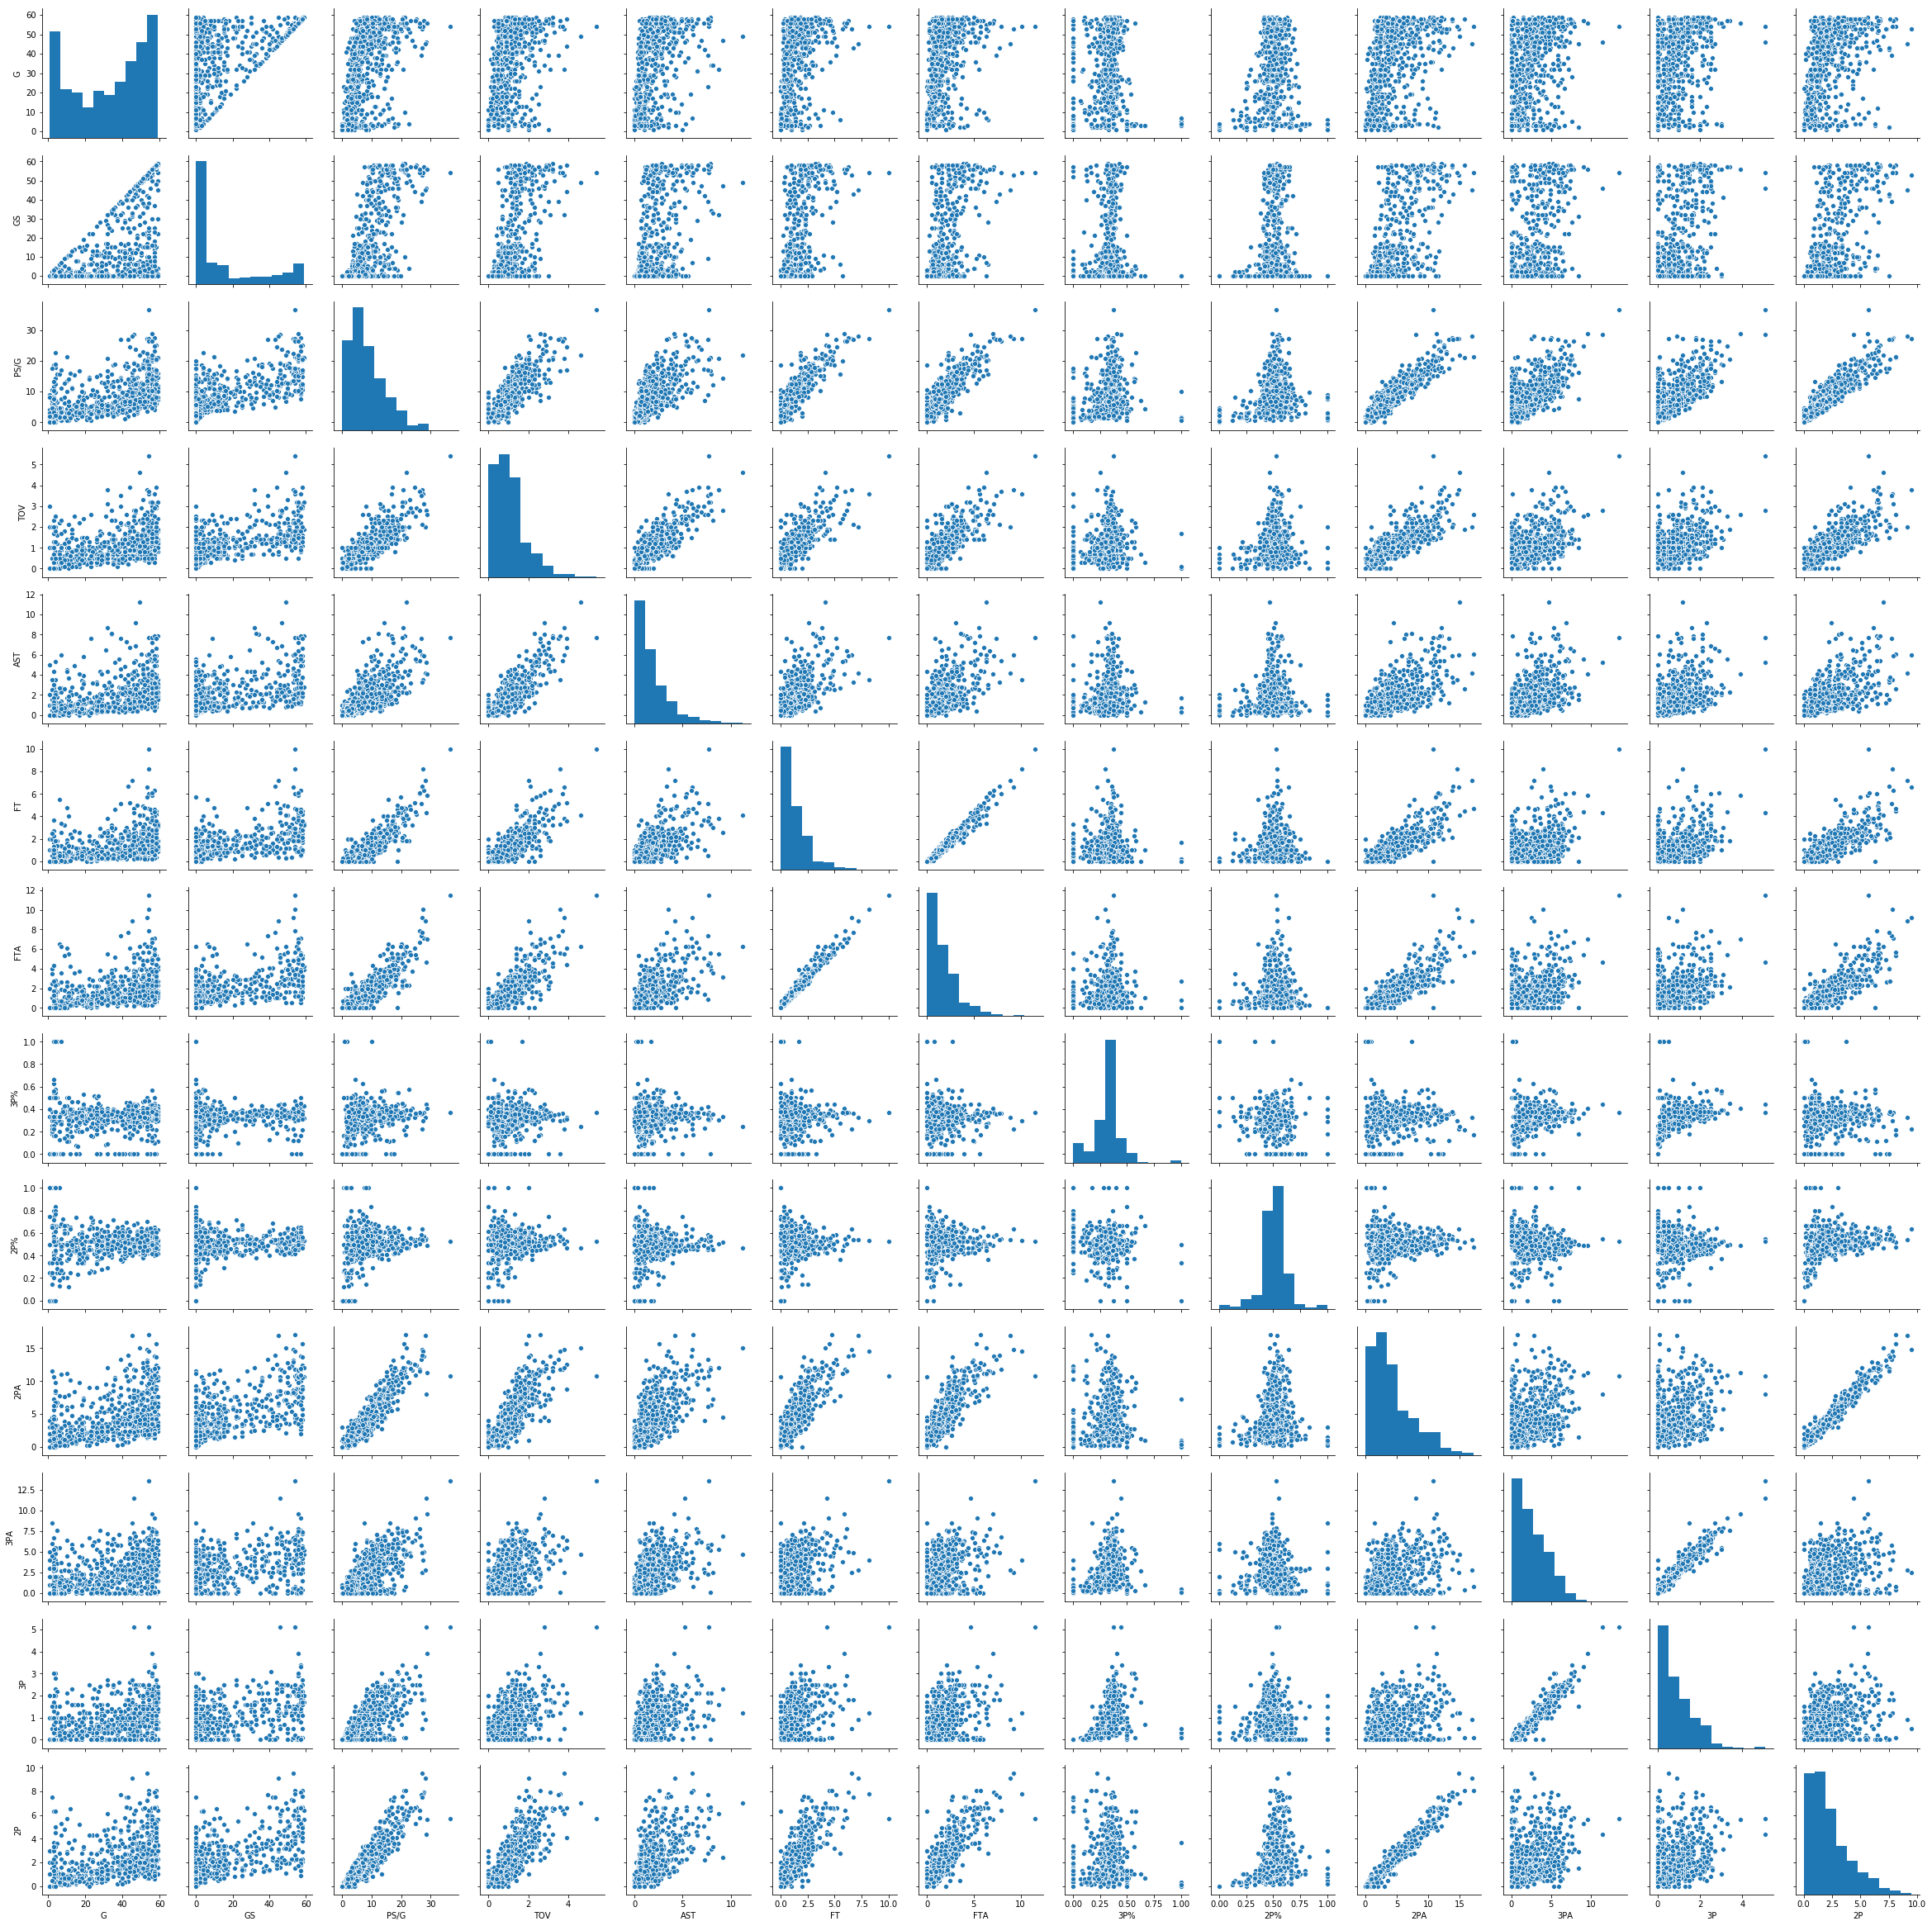

In [60]:
p = sns.pairplot(per_game[['G', 'GS', 'PS/G', 'TOV', 'AST', 'FT', 'FTA', '3P%', '2P%', '2PA', '3PA', '3P', '2P']])
# p.savefig('output.png')

In [61]:
X = per_game[['TOV', 'AST', 'FT', 'FTA', '2P', '3P', '3PA', '2PA']]

In [62]:
y = per_game['PS/G']

# ML

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Create and train model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TOV,-0.001822
AST,-0.006149
FT,0.991354
FTA,0.001221
2P,1.971472
3P,2.949182
3PA,0.017093
2PA,0.018958


## Predictions

In [68]:
predictions = lm.predict(X_test)

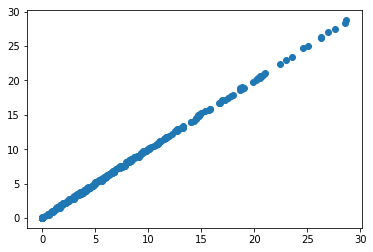

In [69]:
plt.scatter(y_test,predictions)

## Residual Histogram

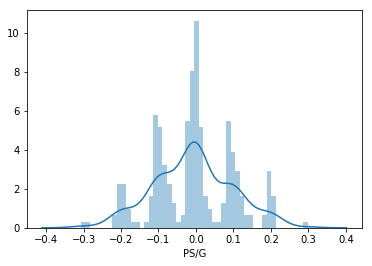

In [70]:
sns.distplot((y_test-predictions),bins=50);

### Regression Evaluation Metrics

In [71]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07956023239104382
MSE: 0.010909970969716016
RMSE: 0.10445080645794945
